In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from data_cleaning import load_and_clean_data
%matplotlib inline

plt.style.use('seaborn')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 6]

/var/folders/t7/pt4bzyfd5z544k7vbm9n9k8c0000gn/T/ipykernel_14984/1387789376.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
df_info = load_and_clean_data('data/0.CC_Informations.xlsx')
df_flux = load_and_clean_data('data/1.Flux_CC_Quotidien_heure_par_heure.xlsx')
df_ca = load_and_clean_data('data/2.CA_Commerçants_Mensuels_par_activité.xlsx')

print("=== Avant nettoyage ===")
print("Colonnes de df_info:", df_info.columns.tolist())
print("Colonnes de df_flux:", df_flux.columns.tolist())
print("Colonnes de df_ca:", df_ca.columns.tolist())

df_flux = df_flux.loc[:, ~df_flux.columns.duplicated()]
df_info = df_info.loc[:, ~df_info.columns.duplicated()]
df_ca = df_ca.loc[:, ~df_ca.columns.duplicated()]

if 'ID Mall' in df_ca.columns and 'ID_MALL' in df_ca.columns:
    df_ca = df_ca.drop('ID Mall', axis=1)
elif 'ID Mall' in df_ca.columns:
    df_ca = df_ca.rename(columns={'ID Mall': 'ID_MALL'})

df_info['ID_MALL'] = df_info['ID_MALL'].astype(str)
df_flux['ID_MALL'] = df_flux['ID_MALL'].astype(str)
df_ca['ID_MALL'] = df_ca['ID_MALL'].astype(str)

if 'Mois' in df_flux.columns:
    df_flux['Mois'] = df_flux['Mois'].astype(int)
if 'Mois' in df_ca.columns:
    df_ca['Mois'] = pd.to_datetime(df_ca['Mois']).dt.month

print("\n=== Après nettoyage ===")
print("Colonnes de df_info:", df_info.columns.tolist())
print("Colonnes de df_flux:", df_flux.columns.tolist())
print("Colonnes de df_ca:", df_ca.columns.tolist())

print("\n=== Fusion des données ===")
df_temp = pd.merge(
    df_flux,
    df_info,
    on='ID_MALL',
    how='left'
)

df_final = pd.merge(
    df_temp,
    df_ca,
    on=['ID_MALL', 'Mois'],
    how='left'
)

df_final.head()

df_final.to_csv('cleaned_data/merged_data.csv', index=False)
print("\nDonnées fusionnées sauvegardées dans: cleaned_data/merged_data.csv")


Traitement du fichier: data/0.CC_Informations.xlsx
Colonnes présentes: ['ID_MALL', 'Centre', 'URL', 'Description SEO', 'Description Actus Shopping', 'Description Offres Emploi', 'Zone push 1', 'Zone push 2', 'Minisite', 'Couleur', 'Hyper Key', 'Logo', 'Aperçu logo', 'Import', 'Statut']
Données nettoyées sauvegardées dans: cleaned_data/clean_0.CC_Informations_cleaned.csv

Traitement du fichier: data/1.Flux_CC_Quotidien_heure_par_heure.xlsx
Colonnes présentes: ['Jour', 'heure', 'Site', 'Zone', 'Entrées', 'Code ensemble immobilier', 'ID mall', 'Année', 'Mois']
Sites présents: ['Antibes' 'Bab 2' 'Bay 2' 'Cesson' 'Cholet' 'Laon' 'Montesson'
 'Nice Lingostiere' 'Perpignan Claira' 'Saint Brieuc']
Sites manquants: set()

Codes ensemble immobilier uniques: ['FB007' 'FB004' 'FB195' 'FB091' 'FB317' 'FB329' 'FB066' 'FB076' 'FB083'
 'FB101']
Données nettoyées sauvegardées dans: cleaned_data/clean_1.Flux_CC_Quotidien_heure_par_heure_cleaned.csv

Traitement du fichier: data/2.CA_Commerçants_Mensuels

In [8]:
df_final.describe()
df_final.head()

,Site,Zone,Entrées,Code ensemble immobilier_x,ID mall,Année,Mois,datetime,jour_semaine,heure_journee,...,periode_jour,saison,Centre,Code ensemble immobilier_y,Sous-famille enseigne,Famille enseigne,Superficie (m²),CA Mensuel TTC N,Nom ensemble immobilier,Galerie/Pac/Hyper
0,Antibes,Centre Commercial,0.0,FB007,53,2023,1,2023-01-01,Sunday,0,...,NaN,Hiver,Centre Commercial Carrefour Antibes,FB007,MAGASINS D`ALIMENTATION,ALIMENTATION ET RESTAURATION,123.70,46933,ANTIBES,Galerie
1,Antibes,Centre Commercial,0.0,FB007,53,2023,1,2023-01-01,Sunday,0,...,NaN,Hiver,Centre Commercial Carrefour Antibes,FB007,MAGASINS D`ALIMENTATION,ALIMENTATION ET RESTAURATION,123.70,47430,ANTIBES,Galerie
2,Antibes,Centre Commercial,0.0,FB007,53,2023,1,2023-01-01,Sunday,0,...,NaN,Hiver,Centre Commercial Carrefour Antibes,FB007,RESTAURATION ASSISE,ALIMENTATION ET RESTAURATION,1016.60,271639,ANTIBES,Galerie
3,Antibes,Centre Commercial,0.0,FB007,53,2023,1,2023-01-01,Sunday,0,...,NaN,Hiver,Centre Commercial Carrefour Antibes,FB007,RESTAURATION ASSISE,ALIMENTATION ET RESTAURATION,1016.60,245211,ANTIBES,Galerie
4,Antibes,Centre Commercial,0.0,FB007,53,2023,1,2023-01-01,Sunday,0,...,NaN,Hiver,Centre Commercial Carrefour Antibes,FB007,RESTAURATION RAPIDE,ALIMENTATION ET RESTAURATION,662.16,223203,ANTIBES,Galerie


### Dataset description
---------

- **ID_MALL** : Unique identifier for each customer.
- **Centre** : Full name of shopping centre

- **Site** : Full name of shopping centre
- **Zone** : Specific area in the shopping centre (e.g. Shopping Centre, Gallery)
- **Entrées** : Number of visitor admissions
- **Année** : Year of registration
- **Mois** : Month of registration
- **Datetime** : Date and time of recording
- **jour_semaine** : Day of the week (Monday to Sunday)
- **weekend** : Weekend indicator (1 for weekend, 0 for weekday)


- **Mois** : Month of registration
- **Sous-famille enseigne** : Detailed sign sub-category
- **Famille enseigne** : Main category of sign
- **Superficie (m²)** : Surface area occupied by the sign
- **CA Mensuel TTC N** : Monthly sales including VAT
- **Nom ensemble immobilier** : Shopping centre name
- **Galerie/Pac/Hype** : Type of location in the shopping centre



In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8894808 entries, 0 to 8894807
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Site                     object        
 1   Zone                     object        
 2   Entrées                  float64       
 3   ID_MALL                  object        
 4   Année                    int64         
 5   Mois                     int64         
 6   datetime                 datetime64[ns]
 7   jour_semaine             object        
 8   heure_journee            int32         
 9   semaine_annee            UInt32        
 10  mois                     int32         
 11  weekend                  int64         
 12  Centre                   object        
 13  Sous-famille enseigne    object        
 14  Famille enseigne         object        
 15  Superficie (m²)          float64       
 16  CA Mensuel TTC N         int64         
 17  Nom ensemble immobilier  ob

## Exploratory Data Analysis

**The goal of EDA is to better understand the distributions of features, identify trends or patterns, and explore relationships between features and the target variable**

In [4]:
df_final[['Entrées', 'CA Mensuel TTC N', 'Superficie (m²)']].describe()


,Entrées,CA Mensuel TTC N,Superficie (m²)
count,8.894808e+06,8.894808e+06,8.894808e+06
mean,4.447229e+02,2.052009e+05,5.116025e+02
std,5.818098e+02,2.278426e+05,6.909193e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.324500e+04,1.247300e+02
50%,4.600000e+01,1.321800e+05,2.520000e+02
75%,8.520000e+02,2.886830e+05,5.670000e+02
max,4.369000e+03,1.892531e+06,5.212000e+03


### Analysis of entries by shopping centre
-----------------------------------------------

All shopping centres show a peak in footfall in month 12 (December), **probably linked to the festive season**.

The summer months (7-8) generally show a drop in visitor numbers. There is a certain seasonality in the number of visitors.

Shopping center footfall analysis reveals three distinct groups. 
**The first group** : Bab 2, Bay 2, Antibes, Nice Lingostiere, and Montesson—shows high footfall with daily averages exceeding 500 admissions. 
Bab 2 and Bay 2 lead this group with 577 and 598 admissions respectively. 

**The second group** : consists of Perpignan Claira and Saint Brieuc, averaging between 400 and 500 entries daily. 

**The third group** : Cesson, Laon, and Cholet—records the lowest attendance, with under 300 daily admissions. Cholet has the lowest average at 227 admissions. 

Peak attendance figures further highlight these differences: Bab 2 reaches a maximum of 4369 admissions, while Laon peaks at just 1705, demonstrating significant variations in visitor attraction capacity during busy periods.

In [18]:
resume_entrees = df_final.groupby('Site')['Entrées'].agg(['count', 'mean', 'sum']).round(2)
print("Résumé des entrées par centre commercial:")
print(resume_entrees)

Résumé des entrées par centre commercial:
                    count    mean          sum
Site                                          
Antibes            651408  541.88  352987756.0
Bab 2             1008312  576.67  581463069.0
Bay 2             1072104  597.81  640912998.0
Cesson             990168  321.91  318741318.0
Cholet             623712  226.52  141285206.0
Laon               783096  250.63  196269948.0
Montesson          839928  508.25  426891182.0
Nice Lingostiere   977328  520.72  508918704.0
Perpignan Claira  1013664  410.21  415811946.0
Saint Brieuc       935088  398.30  372442318.0


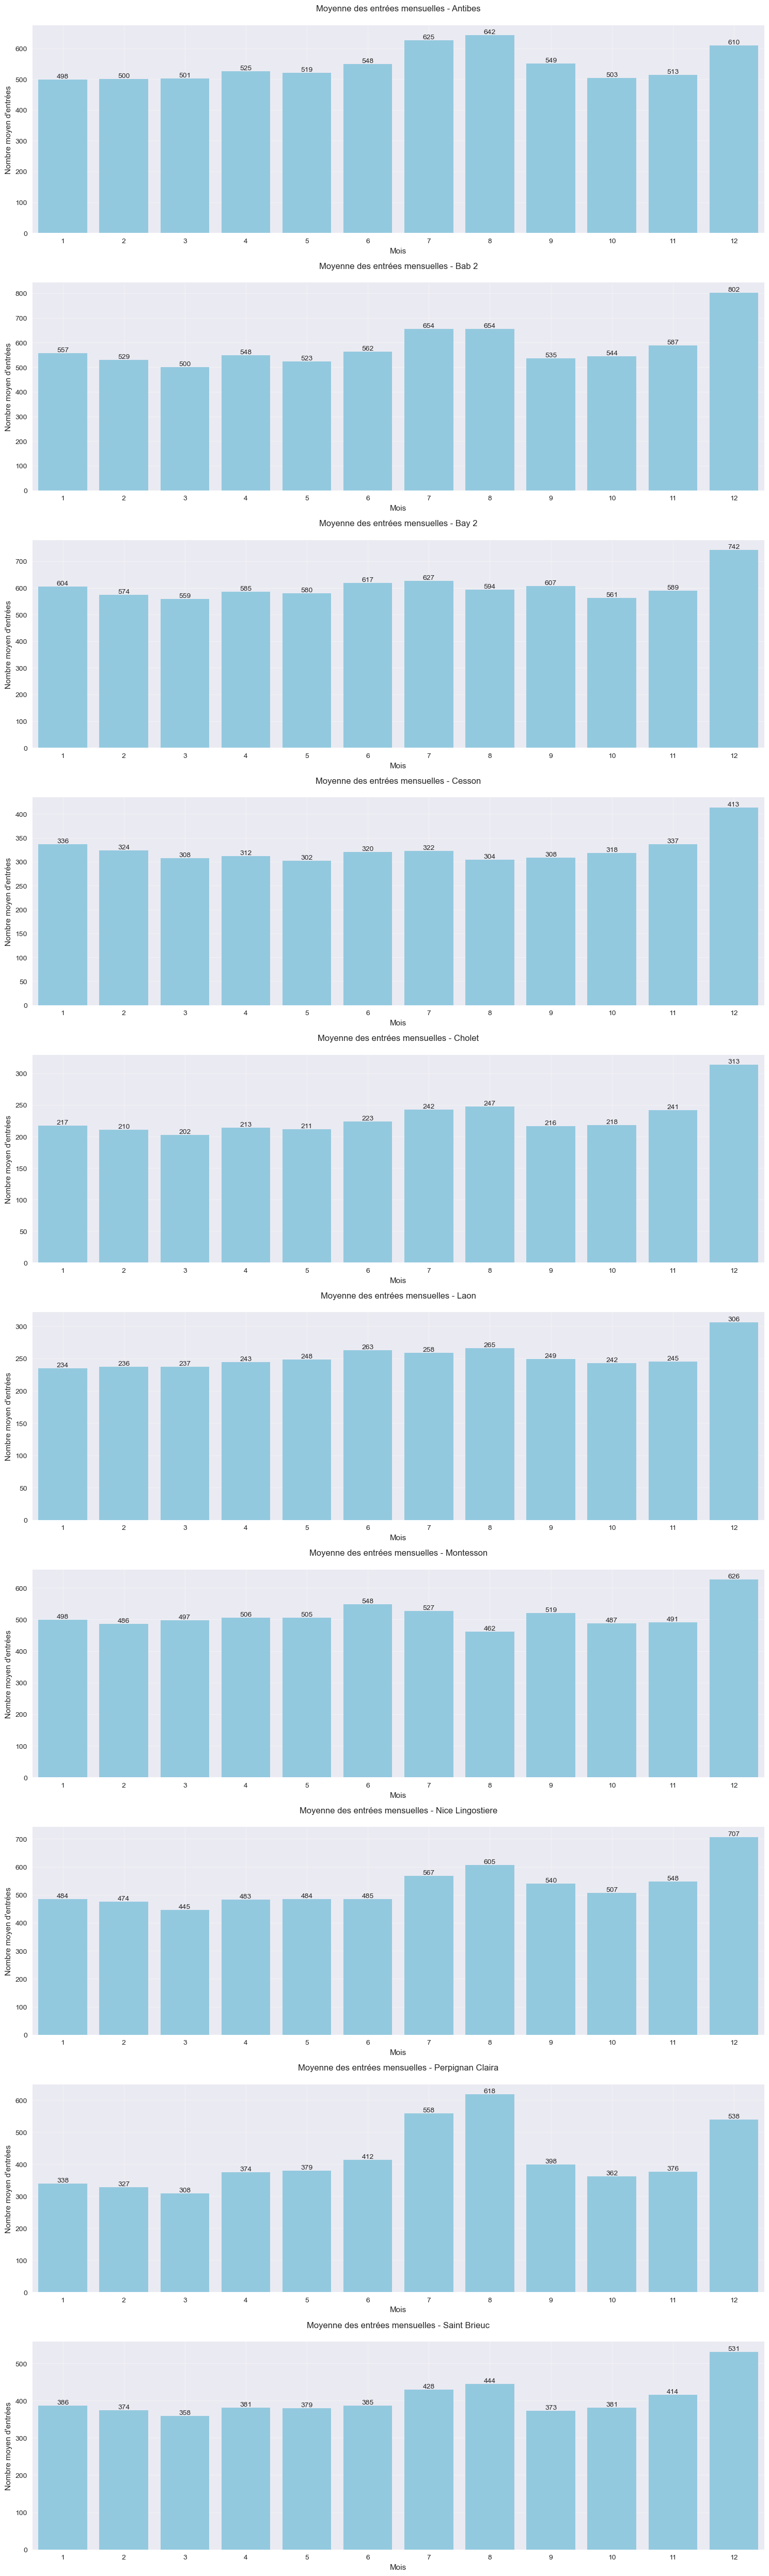


Résumé des entrées par site:
                  Moyenne totale  Total entrées  Maximum
Site                                                    
Antibes                   541.88    352987756.0   2506.0
Bab 2                     576.67    581463069.0   4369.0
Bay 2                     597.81    640912998.0   4036.0
Cesson                    321.91    318741318.0   2186.0
Cholet                    226.52    141285206.0   1829.0
Laon                      250.63    196269948.0   1705.0
Montesson                 508.25    426891182.0   3047.0
Nice Lingostiere          520.72    508918704.0   3512.0
Perpignan Claira          410.21    415811946.0   3332.0
Saint Brieuc              398.30    372442318.0   3060.0


In [12]:
moyenne_mensuelle = df_final.groupby(['Site', 'Mois'])['Entrées'].mean().reset_index()

sites = moyenne_mensuelle['Site'].unique()
n_sites = len(sites)
fig, axes = plt.subplots(n_sites, 1, figsize=(15, 5*n_sites))

# Création d'un graphique pour chaque site
for i, site in enumerate(sites):
    data_site = moyenne_mensuelle[moyenne_mensuelle['Site'] == site]
    
    sns.barplot(data=data_site, 
                x='Mois', 
                y='Entrées',
                ax=axes[i],
                color='skyblue')
    
    axes[i].set_title(f'Moyenne des entrées mensuelles - {site}', pad=20)
    axes[i].set_xlabel('Mois')
    axes[i].set_ylabel('Nombre moyen d\'entrées')
    axes[i].grid(True, alpha=0.3)
    
    # Ajout des valeurs sur les barres
    for j, v in enumerate(data_site['Entrées']):
        axes[i].text(j, v, f'{int(v):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Affichage des statistiques - Version corrigée
print("\nRésumé des entrées par site:")
resume = df_final.groupby('Site').agg({
    'Entrées': ['mean', 'sum', 'max']
}).round(2)

# Renommage des colonnes pour plus de clarté
resume.columns = ['Moyenne totale', 'Total entrées', 'Maximum']
print(resume)

### Clustering Analysis
-----------------------------------------------

/var/folders/t7/pt4bzyfd5z544k7vbm9n9k8c0000gn/T/ipykernel_14984/3515871655.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (site_metrics['moyenne_entrees'][i], site_metrics['max_entrees'][i]),
/Users/idrislakehal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/idrislakehal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/idrislakehal/anaconda3/lib/python3.11/site

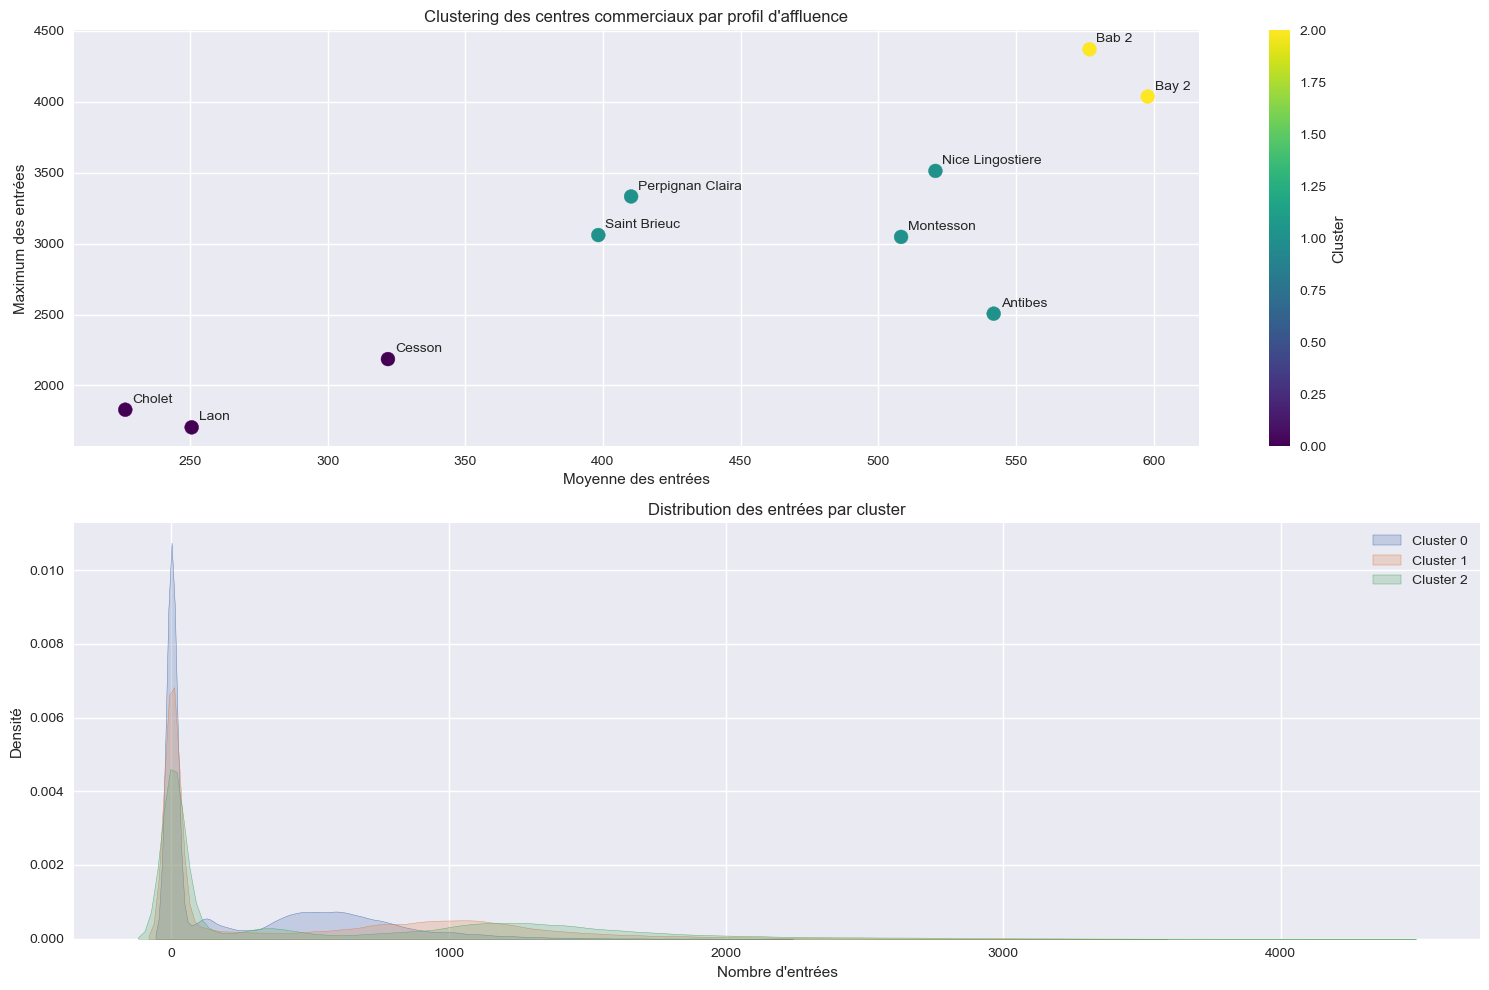


Caractéristiques des clusters:

Cluster 0:
Sites: ['Cesson', 'Cholet', 'Laon']
Moyenne des entrées: 266.35
Maximum des entrées: 1906.67
Heure pic moyenne: 15.0

Cluster 1:
Sites: ['Antibes', 'Montesson', 'Nice Lingostiere', 'Perpignan Claira', 'Saint Brieuc']
Moyenne des entrées: 475.87
Maximum des entrées: 3091.4
Heure pic moyenne: 15.0

Cluster 2:
Sites: ['Bab 2', 'Bay 2']
Moyenne des entrées: 587.24
Maximum des entrées: 4202.5
Heure pic moyenne: 15.0


In [14]:
site_metrics = df_final.groupby('Site').agg({
    'Entrées': ['mean', 'max', 'std'],
    'heure_journee': lambda x: df_final[df_final['Entrées'] == df_final['Entrées'].max()]['heure_journee'].iloc[0]
}).round(2)

site_metrics.columns = ['moyenne_entrees', 'max_entrees', 'std_entrees', 'heure_pic']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(site_metrics)
features_df = pd.DataFrame(features_scaled, columns=site_metrics.columns, index=site_metrics.index)

n_clusters = 3  # Nombre de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
site_metrics['Cluster'] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
scatter = plt.scatter(site_metrics['moyenne_entrees'], 
                     site_metrics['max_entrees'],
                     c=site_metrics['Cluster'],
                     cmap='viridis',
                     s=100)

for i, site in enumerate(site_metrics.index):
    plt.annotate(site, 
                (site_metrics['moyenne_entrees'][i], site_metrics['max_entrees'][i]),
                xytext=(5, 5), 
                textcoords='offset points')

plt.xlabel('Moyenne des entrées')
plt.ylabel('Maximum des entrées')
plt.title('Clustering des centres commerciaux par profil d\'affluence')
plt.colorbar(scatter, label='Cluster')

plt.subplot(2, 1, 2)
for cluster in range(n_clusters):
    sites_cluster = site_metrics[site_metrics['Cluster'] == cluster].index
    cluster_data = df_final[df_final['Site'].isin(sites_cluster)]['Entrées']
    
    sns.kdeplot(data=cluster_data, 
                label=f'Cluster {cluster}',
                fill=True)

plt.xlabel('Nombre d\'entrées')
plt.ylabel('Densité')
plt.title('Distribution des entrées par cluster')
plt.legend()

plt.tight_layout()
plt.show()

print("\nCaractéristiques des clusters:")
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    cluster_sites = site_metrics[site_metrics['Cluster'] == cluster]
    print("Sites:", cluster_sites.index.tolist())
    print("Moyenne des entrées:", cluster_sites['moyenne_entrees'].mean().round(2))
    print("Maximum des entrées:", cluster_sites['max_entrees'].mean().round(2))
    print("Heure pic moyenne:", cluster_sites['heure_pic'].mean().round(2))

### Correlation Matrix
--------------------------

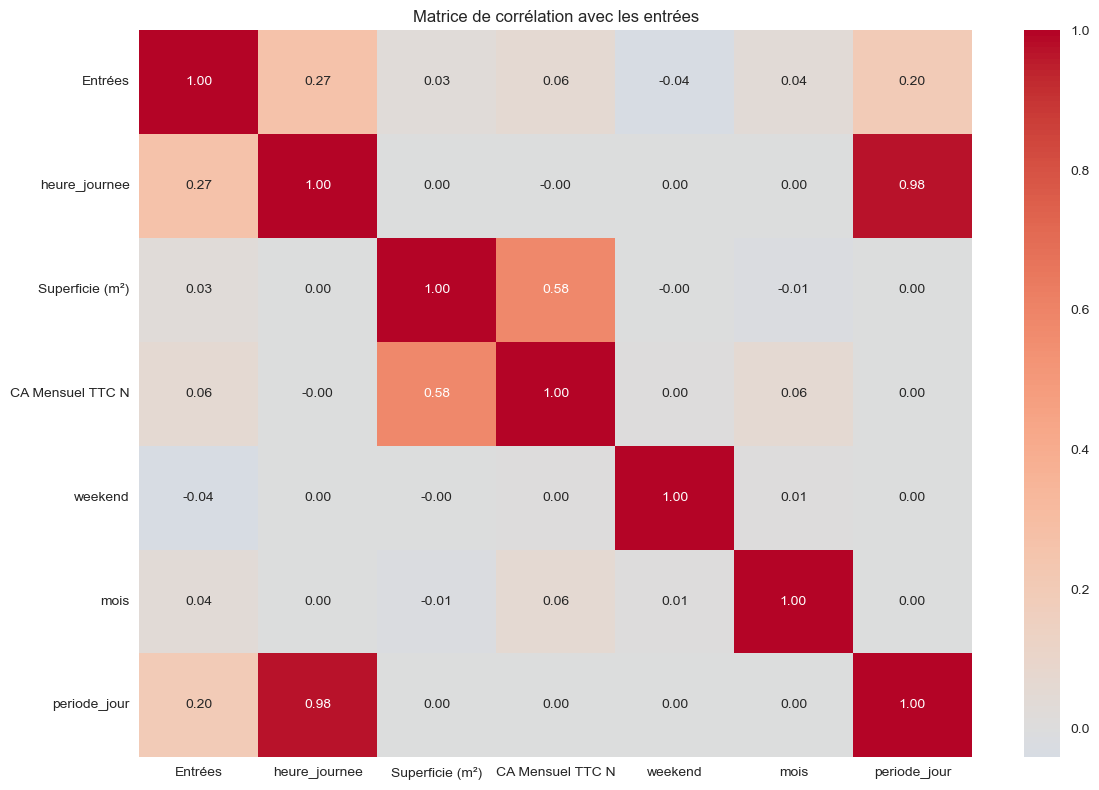

In [15]:
variables_numeriques = ['Entrées', 'heure_journee', 'Superficie (m²)', 'CA Mensuel TTC N']
correlation_data = df_final[variables_numeriques].copy()

correlation_data['weekend'] = df_final['jour_semaine'].isin(['Saturday', 'Sunday']).astype(int)
correlation_data['mois'] = df_final['Mois']

if 'periode_jour' in df_final.columns:
    periode_mapping = {
        'Nuit': 0, 
        'Matin': 1, 
        'Midi': 2, 
        'Après-midi': 3, 
        'Soir': 4
    }
    correlation_data['periode_jour'] = df_final['periode_jour'].map(periode_mapping)

plt.figure(figsize=(12, 8))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Matrice de corrélation avec les entrées')
plt.tight_layout()
plt.show()


Corrélations avec le nombre d'entrées:
Entrées             1.000000
heure_journee       0.265069
periode_jour        0.198247
CA Mensuel TTC N    0.062423
mois                0.039637
Superficie (m²)     0.031563
weekend            -0.040535
Name: Entrées, dtype: float64


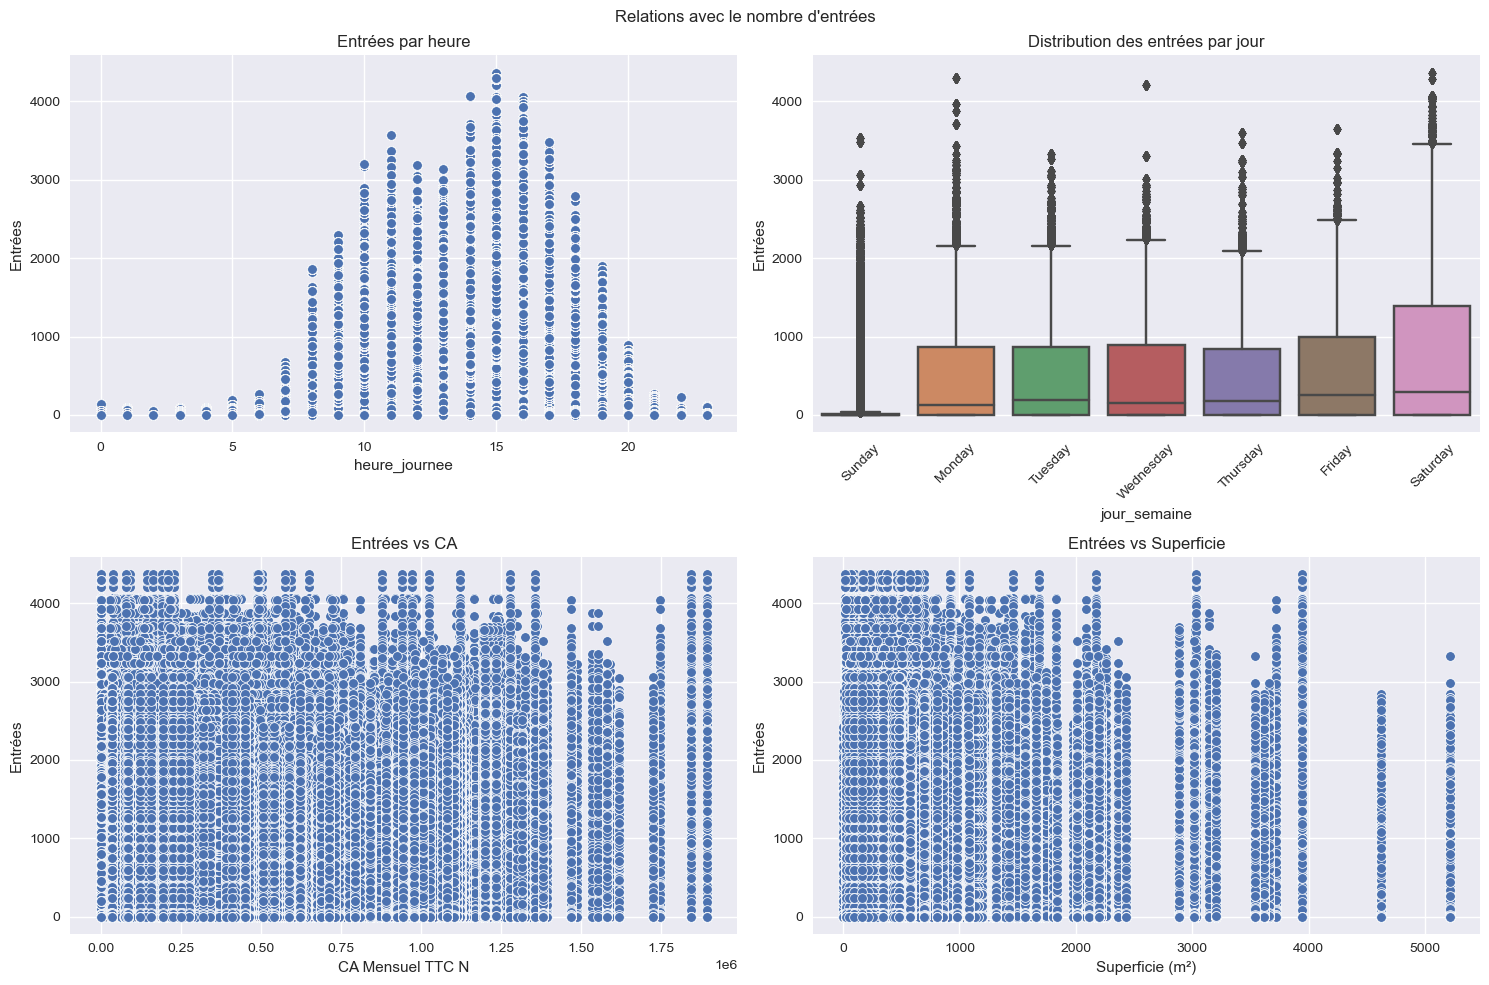


Analyse statistique des relations:

Corrélation entre Entrées et heure_journee: 0.265

Corrélation entre Entrées et Superficie (m²): 0.032

Corrélation entre Entrées et CA Mensuel TTC N: 0.062

Corrélation entre Entrées et weekend: -0.041

Corrélation entre Entrées et mois: 0.040

Corrélation entre Entrées et periode_jour: 0.198


In [17]:
correlations_entrees = correlation_matrix['Entrées'].sort_values(ascending=False)
print("\nCorrélations avec le nombre d'entrées:")
print(correlations_entrees)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Relations avec le nombre d\'entrées')

sns.scatterplot(data=df_final, 
                x='heure_journee', 
                y='Entrées',
                ax=axes[0,0])
axes[0,0].set_title('Entrées par heure')

# 6.2 Entrées vs Jour de la semaine
sns.boxplot(data=df_final,
           x='jour_semaine',
           y='Entrées',
           ax=axes[0,1])
axes[0,1].set_title('Distribution des entrées par jour')
axes[0,1].tick_params(axis='x', rotation=45)

# 6.3 Entrées vs CA
sns.scatterplot(data=df_final,
                x='CA Mensuel TTC N',
                y='Entrées',
                ax=axes[1,0])
axes[1,0].set_title('Entrées vs CA')

sns.scatterplot(data=df_final,
                x='Superficie (m²)',
                y='Entrées',
                ax=axes[1,1])
axes[1,1].set_title('Entrées vs Superficie')

plt.tight_layout()
plt.show()

# 7. Analyse statistique
print("\nAnalyse statistique des relations:")
for col in correlation_data.columns:
    if col != 'Entrées':
        correlation = correlation_data['Entrées'].corr(correlation_data[col])
        print(f"\nCorrélation entre Entrées et {col}: {correlation:.3f}")

/Users/idrislakehal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


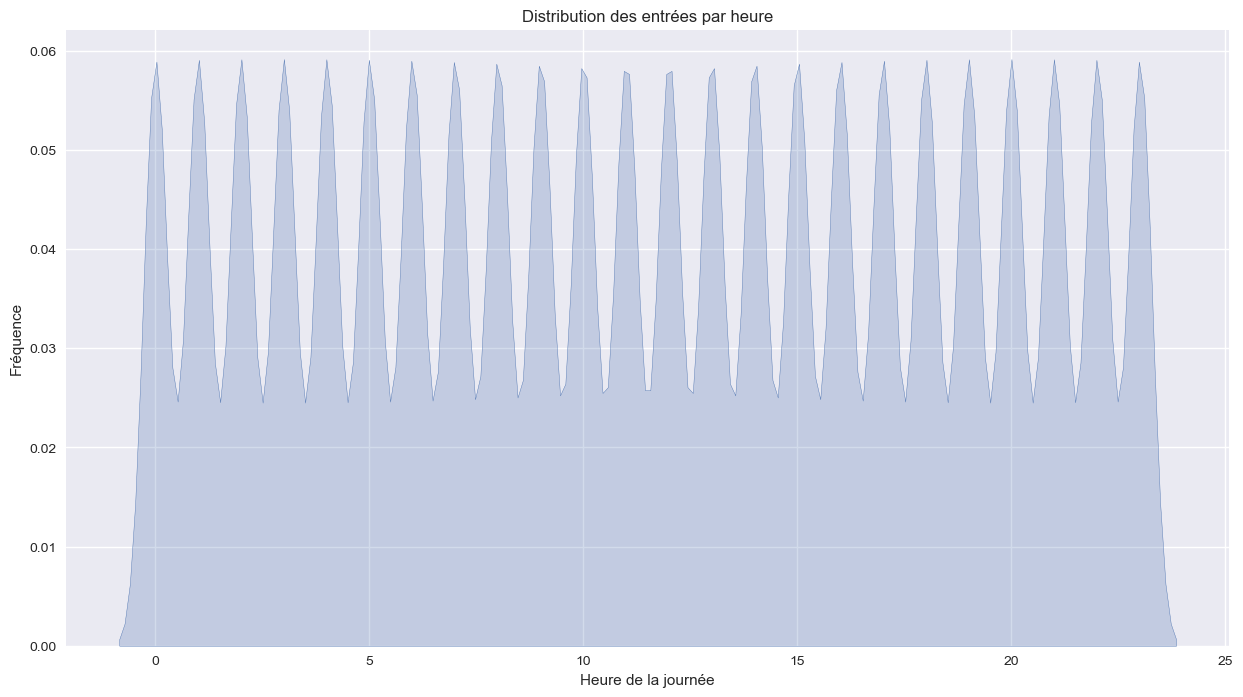

In [22]:
plt.figure(figsize=(15, 8))
sns.kdeplot(df_final['heure_journee'], fill=True)
plt.title('Distribution des entrées par heure')
plt.xlabel('Heure de la journée')
plt.ylabel('Fréquence')
plt.show()

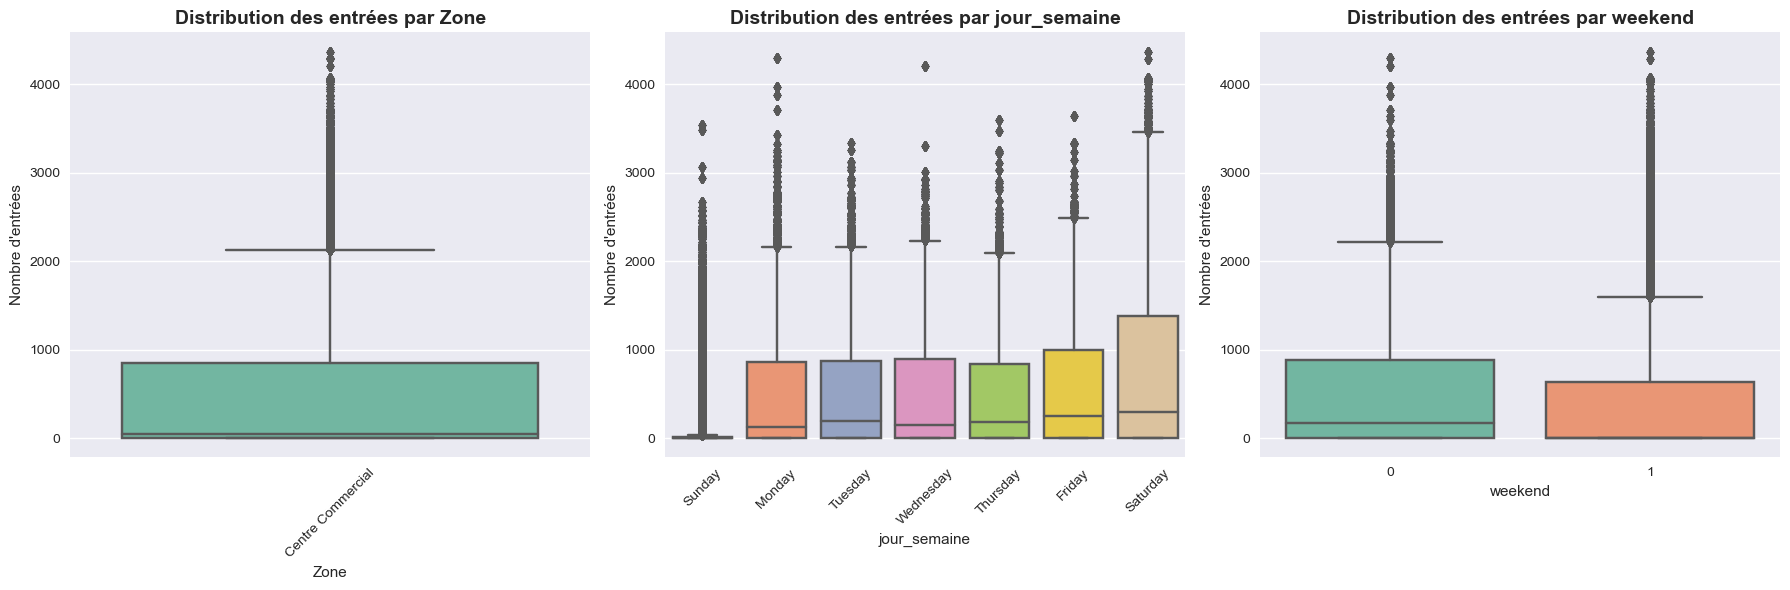

In [7]:
categorical_features = ['Zone', 'jour_semaine', 'weekend']

plt.figure(figsize=(18, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=feature, y='Entrées', data=df_final, palette="Set2")
    plt.title(f'Distribution des entrées par {feature}', fontweight="bold", size=14)
    plt.xlabel(feature)
    plt.ylabel('Nombre d\'entrées')
    plt.xticks(rotation=45 if feature != 'weekend' else 0)

plt.tight_layout()
plt.show()